# Raster plot with stimulus
## Import of modules
We begin with import of the modules we want to use

In [1]:
import numpy as np # numerical python gives us matlab functions
import matplotlib.pyplot as plt # plotting functions
# we want our plots to be visualized inside this notebook
import neo
%matplotlib notebook 
import quantities as pq # physical quantities is nice to use

## Remember, that if you want help you can write a command and press tab, if that does not work put a question mark at the end of the function you want help with, like shown below

In [2]:
plt.plot?

## We make a syntetic spiketrain

In [3]:
t_stop = 10 * pq.s # experiment duration
n_spikes = 100 # number of spikes
times = np.random.random(n_spikes) * t_stop # 100 random numbers between 0 and t_stop
print(times) # write info below

[ 8.53722357  2.24285833  0.09512883  0.25441041  3.14620941  8.94951402
  1.66151503  6.92174451  6.60569245  4.06940547  7.16352725  9.30210004
  7.40292111  2.29327824  1.32407983  9.14573867  1.40501878  7.00206967
  1.23036259  8.8692216   7.88403639  1.23977642  2.81597683  6.3198022
  8.89869426  6.8391877   8.58421032  8.05884606  1.8074867   6.72976769
  0.24570282  2.73747201  2.05912677  0.4923472   5.95906202  9.57105417
  6.94137768  1.14906662  9.71122112  7.08501935  2.3618437   7.75948506
  6.02800614  8.79324917  9.57019691  2.89740255  7.2627239   6.5854079
  3.87652067  3.64401295  9.89082744  1.74936768  2.60483874  4.57063219
  3.96128696  5.72835046  0.44177058  1.31661791  8.33231915  9.48009966
  9.10761701  0.03309578  8.41741665  1.96434443  2.77332253  4.86079571
  9.07852942  7.8991619   7.27204398  9.66968094  0.40196851  5.18970589
  6.51141854  4.69587384  0.01793078  5.65469402  4.48618044  9.79394196
  6.62620634  6.72666978  8.41198547  5.68747242  6.1

In [4]:
sptr = neo.SpikeTrain(times=times, t_stop=t_stop)

In [5]:
sptr

SpikeTrain

<IPython.core.display.Javascript object>


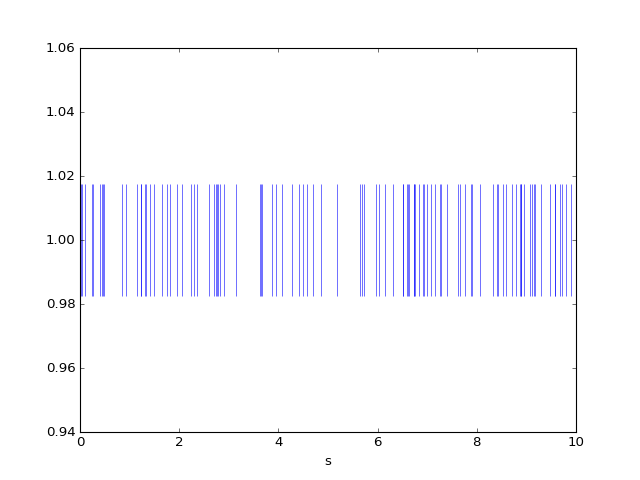

In [6]:
fig, ax = plt.subplots() # make a figure with axes
ax.plot(sptr, np.ones(len(sptr)), ls='none', marker='|', markersize=100) # add spikes to the axes
ax.set_xlim(0*pq.s, sptr.t_stop)
ax.set_xlabel(sptr.dimensionality)

## Now we want to make a histogram to count the number of spikes in given bins

<IPython.core.display.Javascript object>


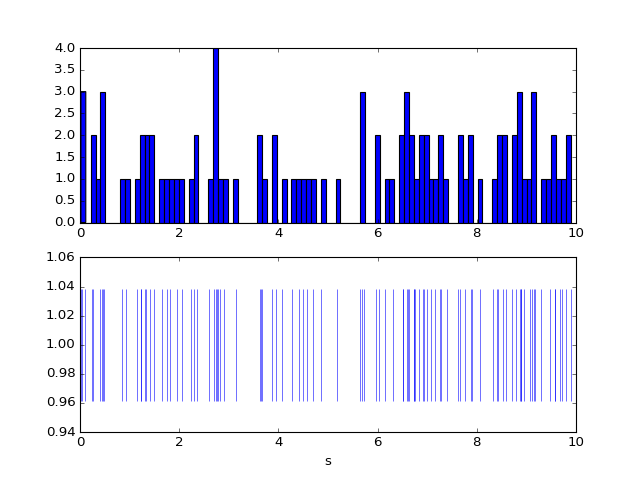

In [7]:
fig, (ax_h, ax_r) = plt.subplots(2, 1) # make a figure with axes
ax_h.hist(sptr, bins=100)
ax_r.plot(sptr, np.ones(len(sptr)), ls='none', marker='|', markersize=100) # add spikes to the axes
ax_r.set_xlim(0*pq.s, sptr.t_stop)
ax_r.set_xlabel(sptr.dimensionality)

# Find the real spiketrain

In [9]:
times1 = np.load('data1.npy')
times2 = np.load('data2.npy')